In [385]:
import requests, bs4
import datetime
from bs4 import BeautifulSoup as bs
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pprint
import re
import csv
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [386]:
redfin_df= pd.read_csv("redfin_data_df")
redfin_df.head()

,Unnamed: 0,Price/Sq.Ft.,Lot Size,Year Built,Tax Annual Amount,Tax Year,Tax Exemptions,bedrooms,bathrooms,sq_footage,price,address,City,Zip Code,State,Link,full_link
0,0,262.0,3123 Sq. Ft.,1960.0,5233.99,2019.0,HomeownerSenior,4,3.5,3000.0,785000,"6511 N Oliphant Ave, Chicago, IL 60631",Chicago,60631,IL,/IL/Chicago/6511-N-Oliphant-Ave-60631/home/136...,https://www.redfin.com/IL/Chicago/6511-N-Oliph...
1,1,162.0,0.26 Acres,2004.0,23923.72,2019.0,NaN,5,5.5,7093.0,1149000,"2037 De Cook Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/2037-De-Cook-Ave-60068/home/136...,https://www.redfin.com/IL/Park-Ridge/2037-De-C...
2,2,358.0,10537 Sq. Ft.,1957.0,NaN,NaN,NaN,3,2.0,1116.0,399900,"1541 Lundergan Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/1541-Lundergan-Ave-60068/home/1...,https://www.redfin.com/IL/Park-Ridge/1541-Lund...
3,3,216.0,6599 Sq. Ft.,1953.0,9610.91,2020.0,NaN,3,1.5,1800.0,389000,"609 N Hamlin Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/609-N-Hamlin-Ave-60068/home/136...,https://www.redfin.com/IL/Park-Ridge/609-N-Ham...
4,4,236.0,6651 Sq. Ft.,1940.0,11431.26,2020.0,Homeowner,3,2.5,2456.0,579000,"1820 S Ashland Ave, Park Ridge, IL 60068",Park Ridge,60068,IL,/IL/Park-Ridge/1820-S-Ashland-Ave-60068/home/1...,https://www.redfin.com/IL/Park-Ridge/1820-S-As...


In [387]:
redfin_df.columns

Index(['Unnamed: 0', 'Price/Sq.Ft.', 'Lot Size', 'Year Built',
       'Tax Annual Amount', 'Tax Year', 'Tax Exemptions', 'bedrooms',
       'bathrooms', 'sq_footage', 'price', 'address', 'City', 'Zip Code',
       'State', 'Link', 'full_link'],
      dtype='object')

In [388]:
redfin_df.rename(columns= {'Price/Sq.Ft.': "price_per_sqfoot", 'Lot Size': "lot_size", 'Year Built': "year_built",
       'Tax Annual Amount': 'annual_tax_amount', 'Tax Year': "tax_year", 'Tax Exemptions': 'tax_exemptions','City': 'city', 'Zip Code': "zip_code",
       'State': 'state', 'Link': 'link'}, inplace =True)

In [389]:
redfin_df= redfin_df[redfin_df["sq_footage"].notna()]

In [390]:
redfin_df= redfin_df[redfin_df["year_built"].notna()]

In [391]:
redfin_df= redfin_df[redfin_df["lot_size"].notna()]

In [392]:
redfin_df= redfin_df[redfin_df["price_per_sqfoot"].notna()]

In [393]:
redfin_df= redfin_df[redfin_df["annual_tax_amount"].notna()]

In [394]:
redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1030
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         744 non-null    int64  
 1   price_per_sqfoot   744 non-null    float64
 2   lot_size           744 non-null    object 
 3   year_built         744 non-null    float64
 4   annual_tax_amount  744 non-null    float64
 5   tax_year           744 non-null    float64
 6   tax_exemptions     498 non-null    object 
 7   bedrooms           744 non-null    object 
 8   bathrooms          744 non-null    float64
 9   sq_footage         744 non-null    float64
 10  price              744 non-null    object 
 11  address            744 non-null    object 
 12  city               744 non-null    object 
 13  zip_code           744 non-null    int64  
 14  state              744 non-null    object 
 15  link               744 non-null    object 
 16  full_link          744 no

In [395]:
redfin_clean= redfin_df.drop(columns= ['Unnamed: 0', 'tax_exemptions', "lot_size", "tax_year", "address", "state", "link", "full_link", "price_per_sqfoot", "annual_tax_amount"])

In [396]:
redfin_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1030
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_built  744 non-null    float64
 1   bedrooms    744 non-null    object 
 2   bathrooms   744 non-null    float64
 3   sq_footage  744 non-null    float64
 4   price       744 non-null    object 
 5   city        744 non-null    object 
 6   zip_code    744 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 46.5+ KB


In [397]:
redfin_clean= redfin_clean[(redfin_clean.bedrooms.str.isnumeric())]

In [398]:
redfin_clean['price']= redfin_clean['price'].astype(int)

In [399]:
redfin_clean['bedrooms']= redfin_clean['bedrooms'].astype(int)

In [400]:
redfin_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 1030
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_built  740 non-null    float64
 1   bedrooms    740 non-null    int64  
 2   bathrooms   740 non-null    float64
 3   sq_footage  740 non-null    float64
 4   price       740 non-null    int64  
 5   city        740 non-null    object 
 6   zip_code    740 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 46.2+ KB


In [401]:
redfin_clean.sort_values("price", ascending=True).head(20)

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code
387,1938.0,3,1.0,1310.0,79900,Bensenville,60106
538,1920.0,3,1.0,1397.0,175000,Buffalo Grove,60089
984,1925.0,4,2.0,2700.0,175000,Wilmette,60091
214,1939.0,3,1.0,1300.0,180000,Mount Prospect,60056
200,1904.0,2,1.0,768.0,199000,Des Plaines,60016
635,1912.0,2,1.0,580.0,209000,Oak Park,60304
260,1950.0,3,2.0,1659.0,209999,Northbrook,60062
636,1925.0,2,1.0,849.0,210000,Oak Park,60304
212,1945.0,3,2.0,1568.0,225000,Des Plaines,60016
355,1938.0,4,1.5,1492.0,228500,Wood Dale,60191


In [402]:
redfin_clean = redfin_clean[redfin_clean['price']< 1200000]

In [403]:
redfin_clean = redfin_clean[redfin_clean['price']> 200000]

In [404]:
redfin_clean = redfin_clean[redfin_clean['sq_footage']< 5100]

In [405]:
redfin_clean.sort_values("sq_footage", ascending=False).head(20)

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code
516,1988.0,4,3.5,5060.0,619500,Arlington Heights,60004
243,1969.0,7,5.5,5000.0,819000,Des Plaines,60016
252,2001.0,4,5.5,5000.0,790000,Northbrook,60062
339,1998.0,4,4.5,4994.0,1000150,Highland Park,60035
1012,1905.0,6,3.5,4975.0,799500,Northfield,60093
776,1960.0,5,5.0,4915.0,910000,Glenview,60025
429,1946.0,3,1.0,4895.0,255000,Franklin Park,60131
91,2005.0,5,3.5,4800.0,1095000,Park Ridge,60068
275,2001.0,5,4.5,4750.0,999000,Northbrook,60062
25,2002.0,5,4.5,4650.0,1049900,Park Ridge,60068


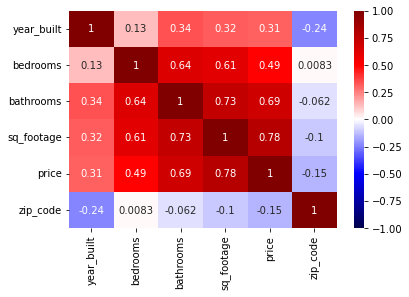

In [406]:
sns.heatmap(redfin_clean.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


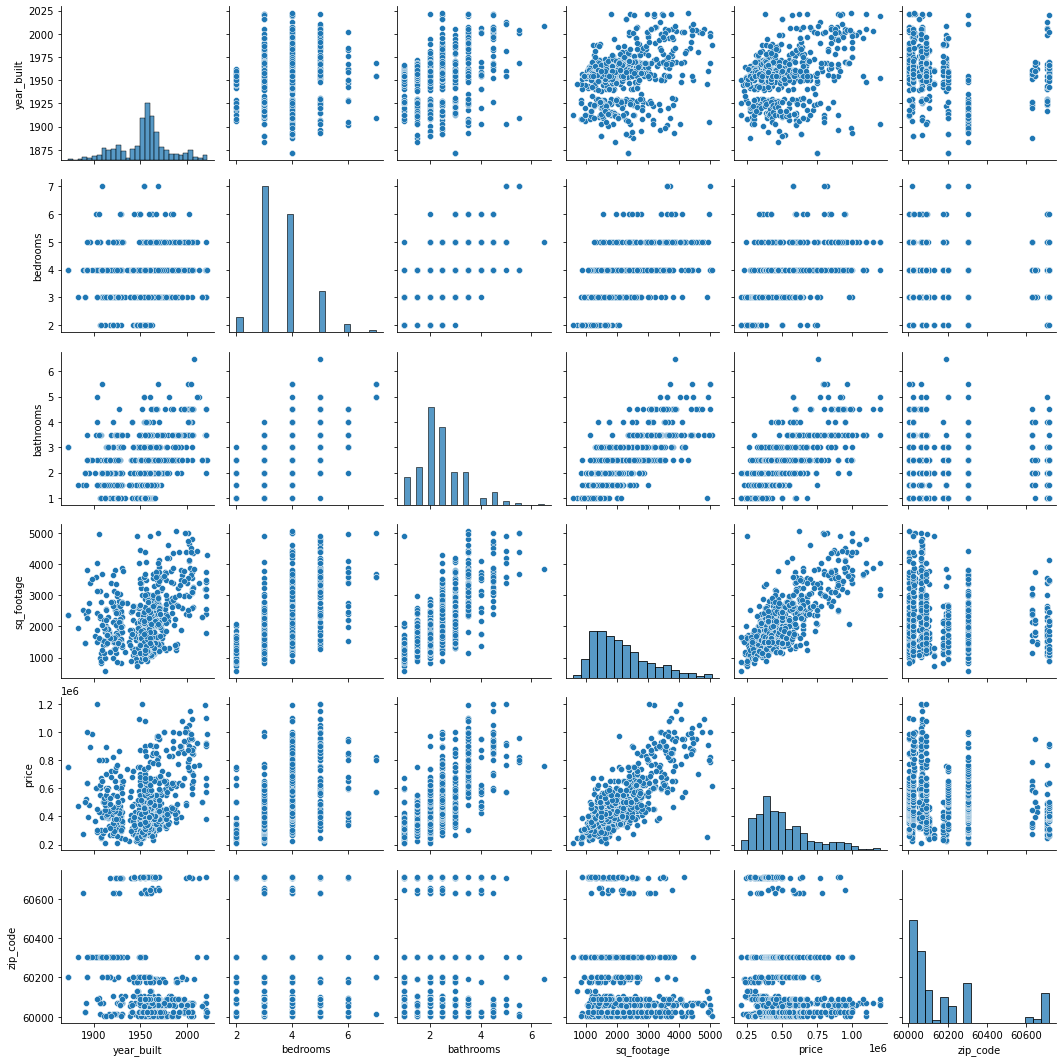

In [407]:
sns.pairplot(redfin_clean);

_____________________________________________________________________________________________________________________

Model 1- Initial Linear Regression

In [408]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
homes = redfin_clean.select_dtypes(include=numerics)
x = homes.drop(columns = ['price','zip_code']).astype(float)
x = sm.add_constant(x)
y = homes['price'].astype(float)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [409]:
model = sm.OLS(y, x, data = redfin_clean)
model_1 = model.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     300.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          7.21e-147
Time:                        20:43:56   Log-Likelihood:                -8683.8
No. Observations:                 663   AIC:                         1.738e+04
Df Residuals:                     658   BIC:                         1.740e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.747e+05   3.69e+05     -1.016      0.310    -1.1e+06    3.49e+05
year_built   256.1129    189.637      1.351      0.177    -116.255     628.480
bedrooms   -1.281e+04   7113.191     -1.801      0.072   -2.68e+04    1156.189
bathrooms     5.9e+04   8064.776      7.316      0.000    4.32e+04    7.48e+04
sq_footage   133.7778      7.865     17.010      0.000     118.335     149.221
==============================================================================
Omnibus:                       49.611   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.153
Skew:                           0.458   Prob(JB):                     1.08e-22
Kurtosis:                       4.680   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [410]:
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['vif'] =[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variable,vif
0,const,6418.745225
1,year_built,1.171623
2,bedrooms,1.878476
3,bathrooms,2.558216
4,sq_footage,2.382821


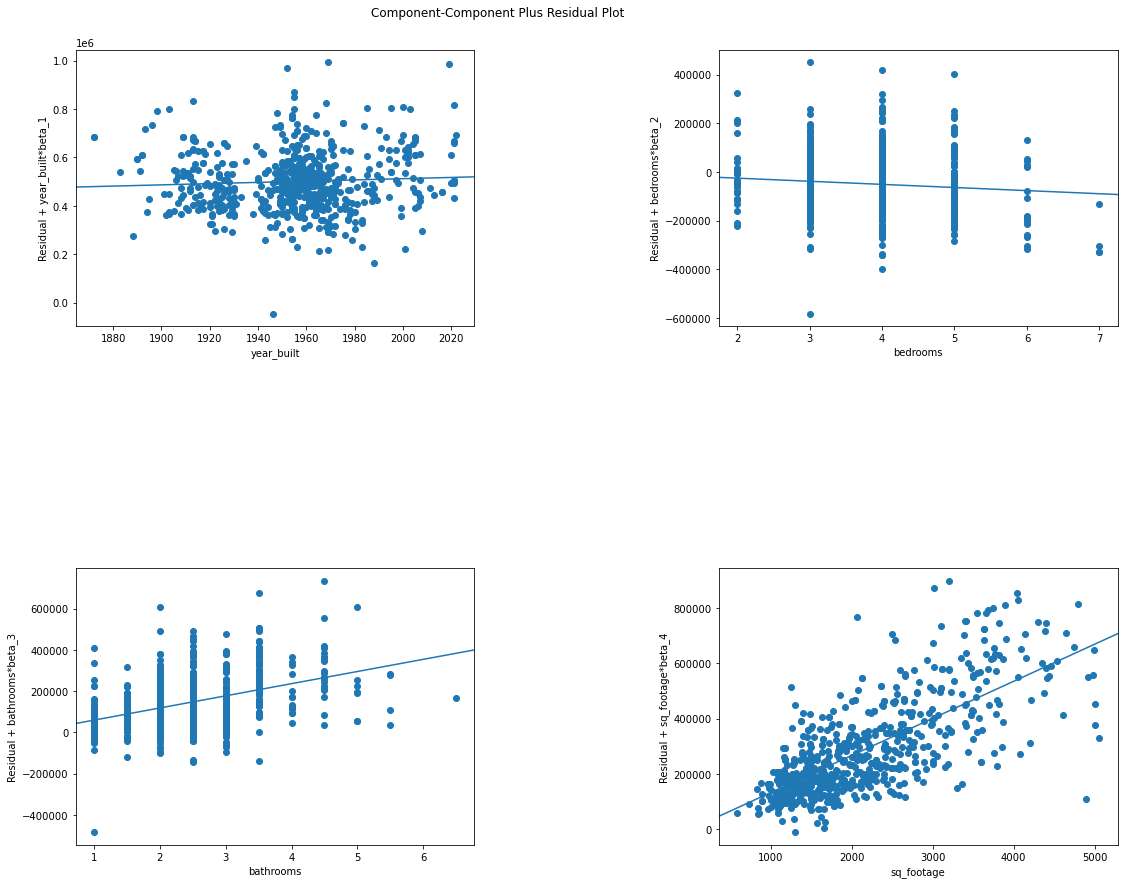

In [411]:
fig = sm.graphics.plot_ccpr_grid(model_1)
fig.set_size_inches(18.5, 20)

<AxesSubplot:ylabel='cooks_d'>

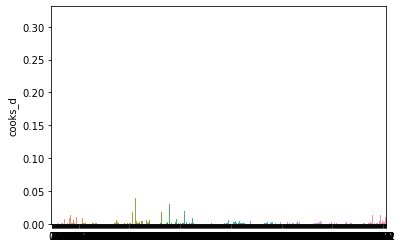

In [412]:
import seaborn as sns
influence = model_1.get_influence()
influence_frame = influence.summary_frame().reset_index()
influence_frame

sns.barplot(y='cooks_d',
            x=influence_frame.index,
            data = influence_frame)

In [413]:
redfin_city = (redfin_clean.groupby(["city", "bedrooms", "bathrooms"], as_index=False).price.first())
redfin_city



,city,bedrooms,bathrooms,price
0,Addison,3,1.5,354900
1,Addison,5,1.0,245000
2,Arlington Heights,2,1.0,300000
3,Arlington Heights,3,1.0,289900
4,Arlington Heights,3,1.5,259900
...,...,...,...,...
223,Wood Dale,4,2.5,374900
224,Wood Dale,5,2.5,375000
225,Wood Dale,5,3.5,480000
226,Wood Dale,5,6.5,755900


In [414]:
#import sweetviz
#my_report = sweetviz.analyze([redfin_city, 'redfin_city'],'price')
#my_report.show_html("redfin_df.html")

In [415]:
#import sweetviz
#my_report = sweetviz.analyze([redfin_clean, 'redfin_clean'],'price')
#my_report.show_html("redfin_clean.html")

Create Dummy Variables

In [416]:
df = pd.get_dummies(redfin_clean, columns=['city'], drop_first=True)
df.head()

,year_built,bedrooms,bathrooms,sq_footage,price,zip_code,city_ Arlington Heights,city_ Bensenville,city_ Buffalo Grove,city_ Chicago,...,city_ Mount Prospect,city_ Niles,city_ Norridge,city_ Northbrook,city_ Northfield,city_ Oak Park,city_ Park Ridge,city_ Schiller Park,city_ Wilmette,city_ Wood Dale
0,1960.0,4,3.5,3000.0,785000,60631,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1953.0,3,1.5,1800.0,389000,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1940.0,3,2.5,2456.0,579000,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1952.0,3,2.0,2187.0,369900,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1951.0,4,2.0,1510.0,564900,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [417]:
#price_sq foot and annual tax - 

In [418]:
X, y = (df.drop('price',axis=1), df['price'])


In [419]:
#split data into train, test and validation 
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2)


In [420]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=2)


In [421]:
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['vif'] =[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variable,vif
0,const,6418.745225
1,year_built,1.171623
2,bedrooms,1.878476
3,bathrooms,2.558216
4,sq_footage,2.382821


In [422]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.759045113184994

In [423]:
lr.score(X_val,y_val)

0.7722480254708008

In [424]:
#function to calculate adjusted r2-is the proportion of the variance in the response variable 
#that can be explained by the predictor variables in a linear regression model.
#n = number of observations
#k = the number of predictor variables

def R_adjusted(r2, n, k):
    return 1- ((1-r2)*(n-1))/(n-k-1)

In [425]:
#Mean Absolute Error (MAE)- 
#we’re just looking at the absolute difference between the data and the model’s predictions
#Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model 
#a small MAE suggests the model is great at prediction
#a large MAE suggests that your model may have trouble in certain areas. 
#A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [426]:
#When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. 
#the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). 
#By default, the score method does not need the actual predictions. So, when you call: clf.score(X_test, y_test)
#it makes predictions using X_test under the hood and uses those predictions to calculate accuracy score. 
#Think of score as a shorthand to calculate accuracy since it is such a common metric. 



In [427]:
#Scoring is also called prediction

In [428]:
# Logistic Regression fits a line to a dataset and then returns the probability 
#that a new sample belongs to one of the two classes according to its location with respect to the line.
lr = LinearRegression()
lr.fit(X_train, y_train)
#fit best values 

#class prediction
##function to calculate adjusted r2-is the proportion of the variance in the response variable 
val_set_pred = lr.predict(X_val)
r2 = lr.score(X_val, y_val) 
n = len(y_val) #n = number of observations
k = len(X_train.columns)#k = the number of predictor variables



mean_square_error = mae(y_val, val_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train, y_train)
R2_val = lr.score(X_val, y_val)

nl = '\n'

print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')
#model off by 78K

mae:78562.90169349268
r2_train:0.759045113184994
r2_val0.7722480254708008
r2_adj0.7163843336051483


In [429]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8483758774961174

In [430]:
lr_poly.score(X_val_poly, y_val)

-619346049.5624462

In [431]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968850737.008789, tolerance: 1328399916.1355186
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2735184692.46875, tolerance: 1328399916.1355186
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1854139639.444336, tolerance: 1221287925.8057704
  model = cd_fast.enet_coordinate_descent(
/User

0.7739627215995808

In [432]:
lasso.score(X_val_poly_scaled, y_val)

0.7570788469345341

In [433]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2153732493.3271484, tolerance: 1800283849.8323035
  model = cd_fast.enet_coordinate_descent_gram(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1888083342.1201172, tolerance: 1800283849.8323035
  model = cd_fast.enet_coordinate_descent_gram(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1861291755.194336, tolerance: 1760172715.7757773
  model = cd_fast.enet_coordinate_d

0.6774782673625296

In [434]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [435]:
#x, y: string, series, or vector array
#Input variables. If strings, these should correspond with column names in data. 
#When pandas objects are used, axes will be labeled with the series name.

#fit_regbool, optional
#If True, estimate and plot a regression model relating the x and y variables

#x_ci“ci”, “sd”, int in [0, 100] or None, optional
#Size of the confidence interval used when plotting a central tendency for discrete values of x. 
#If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

#axmatplotlib Axes, optional
#Axes object to draw the plot onto, otherwise uses the current Axes.

As price increases the regression model has a more difficult time handling those data points.



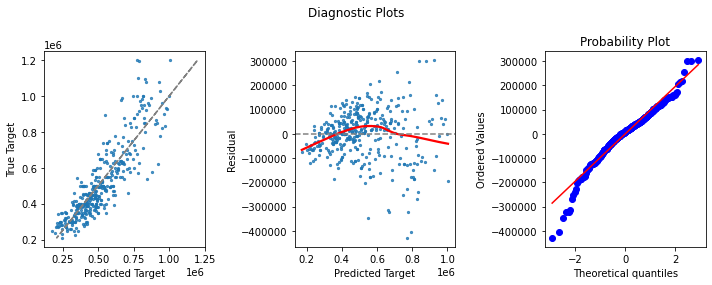

In [436]:
#Plot data and a linear regression model fit.
diagnostic_plots(lr.predict(X_train), y_train)

#1
#y- actual value
#better at predicting lower proce houses

#2- y- distance away from prediction- heterskadistity -variance isnt contant 

#3- qq plot- quantiles of 2 distribution - normal distribution (x) , quantilies of obesved data (y)

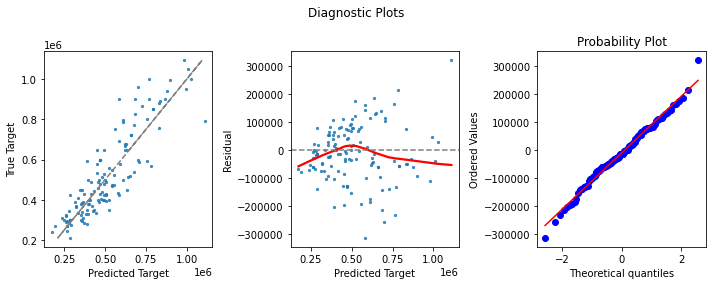

In [437]:
diagnostic_plots(lr.predict(X_val), y_val)


<AxesSubplot:>

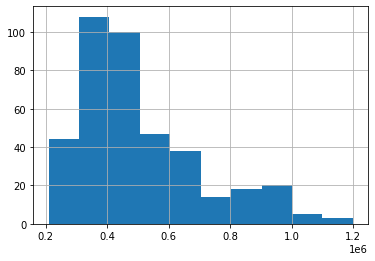

In [438]:
y_train.hist()


In [439]:
from sklearn.preprocessing import PolynomialFeatures

In [440]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.8483758774961174

In [441]:
lr_poly.score(X_val_poly, y_val)

-619346049.5624462

Lasso Model

In [442]:
#lasso - method of regulization , keeps most important features and zeros everything else out , stronger lambda the stronger affect 


In [443]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



alphalist_l = 10**(np.linspace(-4,4,400))
err_vec_val = np.zeros(len(alphalist_l))
err_vec_train = np.zeros(len(alphalist_l))

for i,curr_alpha in enumerate(alphalist_l):

    # note the use of a sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957665098247.4758, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957664739767.1553, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957664364348.7817, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957642376035.762, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957640943934.4587, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957639444166.1946, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/U

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957551601144.7295, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957545879826.244, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957539888162.636, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Us

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957188928384.7622, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957166068486.7847, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1957142128213.5645, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955739488400.606, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955648103322.5283, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955552396224.8179, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/U

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949939484342.4126, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949573413800.8804, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949189980646.8943, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926614415428.0435, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1925135998121.0054, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1923586757266.102, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/U

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1824813361247.739, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1818347745087.9504, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1811558295764.8108, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/U

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1378897129534.7544, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1348256382793.4517, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1315845229333.0972, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104334621075.73633, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60860615621.73779, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26532602892.948242, tolerance: 1617629887.0819643
  model = cd_fast.enet_coordinate_descent(
/U

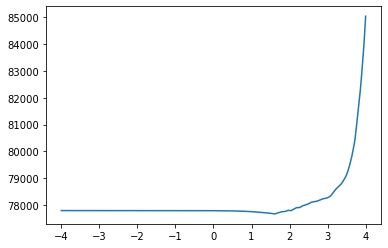

In [444]:
plt.plot(np.log10(alphalist_l), err_vec_val)


In [445]:
np.min(err_vec_val)


77671.79374199826

In [446]:
alphalist_l[np.argmin(err_vec_val)]


41.118294024358285

In [447]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_tval = std.transform(X_val.values)
X_te = std.transform(X_test.values)
lasso_model = Lasso(alpha = alphalist_l[np.argmin(err_vec_val)])
lasso_model.fit(X_tr,y_train)

Lasso(alpha=41.118294024358285)

In [448]:

val_set_pred = lasso_model.predict(X_tval)
train_set_pred = lasso_model.predict(X_tr)

In [449]:
r2 = r2_score(y_val, val_set_pred)
n = len(X_val)
k = len(X_val.columns)

mean_square_error = mae(y_val, val_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred)
R2_val = r2_score(y_val, val_set_pred)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:77671.79374199826
r2_train:0.7578075069742322
r2_val0.7766014884722579
r2_adj0.7218056271541324


In [450]:

coef = list(lasso_model.coef_)
coef = [int(round(x, 0)) for x in coef]
coef_list = list(zip(X_train.columns, coef))

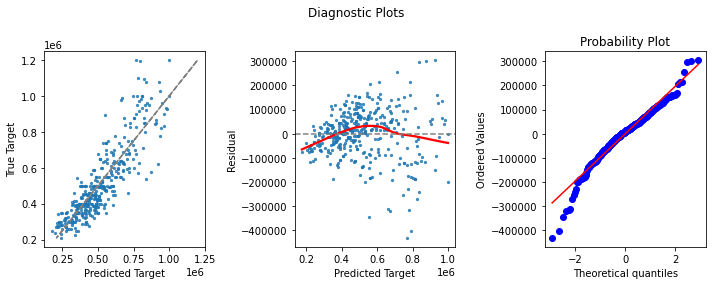

In [451]:

diagnostic_plots(lasso_model.predict(X_tr), y_train)

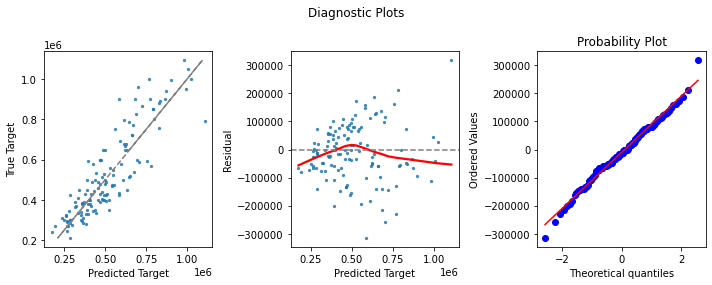

In [452]:
diagnostic_plots(lasso_model.predict(X_tval), y_val)



In [453]:
coef = list(lasso_model.coef_)
coef = [int(round(x, 0)) for x in coef]
coef_list = list(zip(X_train.columns, coef))
keep_list = list(filter(lambda x: x[1] != 0, coef_list))
final_col_list = [x[0] for x in keep_list]
df_coef = pd.DataFrame(keep_list, columns = ('feature', 'coef'))
df_coef.sort_values('coef', ascending=False).head(30)

,feature,coef
3,sq_footage,113318
22,city_ Wilmette,50843
2,bathrooms,41765
20,city_ Park Ridge,39803
11,city_ Evanston,36361
13,city_ Glenview,35924
18,city_ Northbrook,35816
19,city_ Oak Park,28190
0,year_built,19644
5,city_ Arlington Heights,15761


In [454]:
X_train_n = X_train[X_train.columns.intersection(final_col_list)]
X_val_n = X_val[X_val.columns.intersection(final_col_list)]
X_test_n = X_test[X_test.columns.intersection(final_col_list)]
X_train_n.head()

,year_built,bedrooms,bathrooms,sq_footage,zip_code,city_ Arlington Heights,city_ Bensenville,city_ Buffalo Grove,city_ Chicago,city_ Des Plaines,...,city_ Highland Park,city_ Morton Grove,city_ Mount Prospect,city_ Norridge,city_ Northbrook,city_ Oak Park,city_ Park Ridge,city_ Schiller Park,city_ Wilmette,city_ Wood Dale
410,1964.0,4,4.0,2188.0,60176,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
299,1972.0,3,2.0,1420.0,60062,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
453,1952.0,3,1.5,1560.0,60004,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
686,1923.0,3,2.0,1273.0,60302,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
673,1915.0,5,2.5,2300.0,60302,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [455]:

from sklearn.linear_model import lars_path
X_lars = np.array(X_train_n)
y_lars = np.array(y_train)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_lars, y_lars, 
                             method='lasso')

Computing regularization path using the LARS ...


In [456]:
lr = LinearRegression()
lr.fit(X_train_n, y_train)

val_set_pred_n = lr.predict(X_val_n)
r2 = lr.score(X_val_n, y_val)
n = len(X_val_n)
k = len(X_train_n.columns)


mean_square_error = mae(y_val, val_set_pred_n)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train_n, y_train)
R2_val = lr.score(X_val_n, y_val)

nl = '\n'

print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:77781.57487923319
r2_train:0.7578504117335267
r2_val0.7767389895345056
r2_adj0.7271254316532847


In [457]:
alphalist_r = 10**(np.linspace(-2,10,200))
err_vec_val = np.zeros(len(alphalist_r))
err_vec_train = np.zeros(len(alphalist_r))

for i,curr_alpha in enumerate(alphalist_r):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train_n.values, y_train)
    
    val_set_pred_r = pipe.predict(X_val_n.values)
    err_vec_val[i] = mae(y_val, val_set_pred_r)

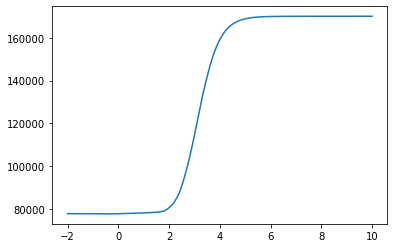

In [458]:
plt.plot(np.log10(alphalist_r), err_vec_val)


In [459]:
np.min(err_vec_val)


77660.73278452652

In [460]:
alphalist_r[np.argmin(err_vec_val)]


0.5607169938205459

In [461]:
std = StandardScaler()
std.fit(X_train_n.values)
X_tr_r= std.transform(X_train_n.values)
X_tval_r= std.transform(X_val_n.values)
X_te_r = std.transform(X_test_n.values)
ridge_model = Ridge(alpha = alphalist_r[np.argmin(err_vec_val)])
ridge_model.fit(X_tr_r,y_train)

Ridge(alpha=0.5607169938205459)

In [462]:
val_set_pred_r = ridge_model.predict(X_tval_r)
train_set_pred_r = ridge_model.predict(X_tr_r)

In [463]:
r2 = r2_score(y_val, val_set_pred_r)
n = len(X_val_n)
k = len(X_val_n.columns)

mean_square_error = mae(y_val, val_set_pred_r)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred_r)
R2_val = r2_score(y_val, val_set_pred_r)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:77660.73278452652
r2_train:0.75780378841606
r2_val0.7766272006721837
r2_adj0.7269888008215579


In [464]:

coef = [int(x) for x in  ridge_model.coef_]
coef_list = list(zip(X_train_n.columns, coef))
coef_list
df_coef2 = pd.DataFrame(coef_list, columns = ('feature', 'coef'))
df_coef2.sort_values('coef', ascending=False)

,feature,coef
3,sq_footage,113035
22,city_ Wilmette,50669
2,bathrooms,41907
20,city_ Park Ridge,39543
11,city_ Evanston,36187
13,city_ Glenview,35660
18,city_ Northbrook,35613
19,city_ Oak Park,28051
0,year_built,19717
5,city_ Arlington Heights,15501


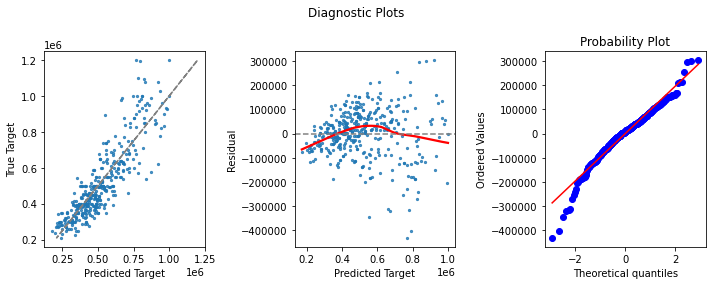

In [465]:
diagnostic_plots(ridge_model.predict(X_tr_r), y_train)


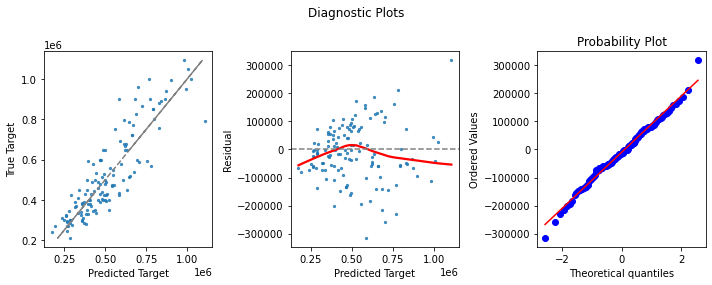

In [466]:
diagnostic_plots(ridge_model.predict(X_tval_r), y_val)


In [467]:
test_set_pred = lasso_model.predict(X_te)
r2 = r2_score(y_test, test_set_pred )
n = len(X_test)
k = len(X_test.columns)

mean_square_error = mae(y_test, test_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred)
R2_val = r2_score(y_val, val_set_pred)
R2_test = r2_score(y_test, test_set_pred)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:73158.14099344701
r2_train:0.7578075069742322
r2_val0.7766014884722579
r2_test0.6661363854666408
r2_adj0.5842453102037414


In [468]:
test_set_pred_n = lr.predict(X_test_n)
r2 = lr.score(X_test_n, y_test)
n = len(X_test_n)
k = len(X_test_n.columns)


mean_square_error = mae(y_test, test_set_pred_n)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train_n, y_train)
R2_val = lr.score(X_val_n, y_val)
R2_test = r2_score(y_test, test_set_pred_n)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:73140.8473078627
r2_train:0.7578504117335267
r2_val0.7767389895345056
r2_test0.6662739884532756
r2_adj0.5921126525540035


In [469]:
test_set_pred_r = ridge_model.predict(X_te_r)
r2 = r2_score(y_test, test_set_pred_r)
n = len(X_test_n)
k = len(X_test_n.columns)

mean_square_error = mae(y_test, test_set_pred_r)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred_r)
R2_val = r2_score(y_val, val_set_pred_r)
R2_test = r2_score(y_test, test_set_pred_r)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:73103.59844870711
r2_train:0.75780378841606
r2_val0.7766272006721837
r2_test0.6667953978842005
r2_adj0.5927499307473562


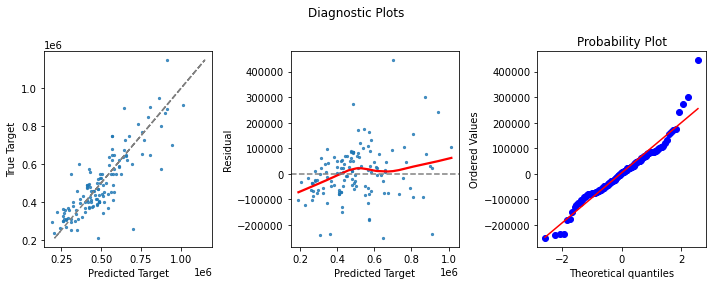

In [470]:
diagnostic_plots(ridge_model.predict(X_te_r), y_test)


<Figure size 648x792 with 0 Axes>

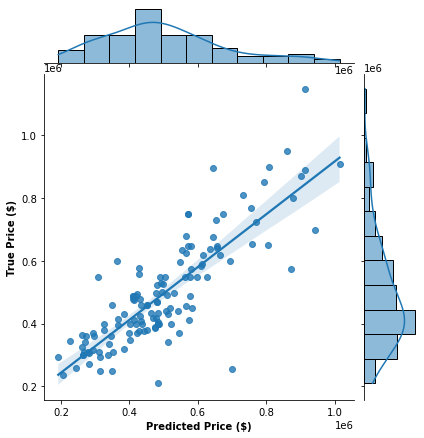

In [471]:
fig = plt.figure(figsize=(9, 11))

preds = ridge_model.predict(X_te_r) # generate predictions (on training data) using fit model

pt = sns.jointplot(x=preds,y=y_test, kind='reg')
pt.ax_joint.set_xlabel('Predicted Price ($)', fontweight='bold')
pt.ax_joint.set_ylabel('True Price ($)', fontweight='bold')
plt.savefig('test_prediction.png',bbox_inches = 'tight')

In [472]:
redfin_clean

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code
0,1960.0,4,3.5,3000.0,785000,Chicago,60631
3,1953.0,3,1.5,1800.0,389000,Park Ridge,60068
4,1940.0,3,2.5,2456.0,579000,Park Ridge,60068
5,1952.0,3,2.0,2187.0,369900,Park Ridge,60068
6,1951.0,4,2.0,1510.0,564900,Park Ridge,60068
...,...,...,...,...,...,...,...
1015,1967.0,5,4.5,3588.0,899000,Wilmette,60091
1016,1997.0,4,4.5,3468.0,935000,Wilmette,60091
1018,1969.0,3,2.0,2065.0,975000,Wilmette,60091
1020,1955.0,4,3.5,3684.0,1075000,Wilmette,60091


In [473]:
redfin_clean.zip_code.unique()

array([60631, 60068, 60714, 60707, 60016, 60056, 60018, 60062, 60035,
       60025, 60191, 60106, 60101, 60176, 60706, 60131, 60656, 60005,
       60004, 60089, 60053, 60646, 60304, 60302, 60026, 60202, 60203,
       60201, 60645, 60091, 60093])

In [474]:
redfin_clean.groupby(["city", "bedrooms", "bathrooms"])

In [475]:
redfin_clean.groupby(["city", "bedrooms", "bathrooms"]).sq_footage.first()

city                bedrooms  bathrooms
 Addison            3         1.5          1200.0
                    5         1.0          2023.0
 Arlington Heights  2         1.0           832.0
                    3         1.0          1000.0
                              1.5          1100.0
                                            ...  
 Wood Dale          4         2.5          3300.0
                    5         2.5          2428.0
                              3.5          2398.0
                              6.5          3853.0
                    6         3.0          2210.0
Name: sq_footage, Length: 228, dtype: float64

In [476]:
redfin_clean['price']

0        785000
3        389000
4        579000
5        369900
6        564900
         ...   
1015     899000
1016     935000
1018     975000
1020    1075000
1022    1199000
Name: price, Length: 663, dtype: int64

Text(0.5, 0, 'Sq Footage')

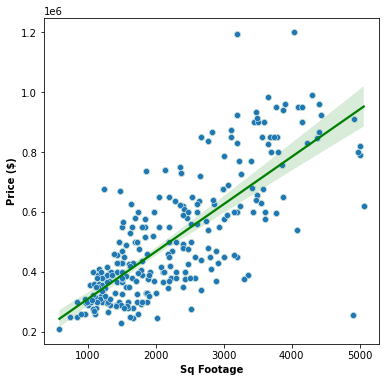

In [477]:
fig = plt.figure(figsize=(6, 6))

x1 = redfin_clean.groupby(["zip_code", "bedrooms", "bathrooms"]).sq_footage.first()
y1 = redfin_clean.groupby(["zip_code", "bedrooms", "bathrooms"]).price.first()

pt = sns.regplot(x=x1, y=y1, color='g', scatter_kws={'alpha':0.3})
pt = sns.scatterplot(x=x1,y=y1)

plt.ylabel("Price ($)", fontweight='bold')
plt.xlabel("Sq Footage", fontweight='bold')

#plt.savefig('price_vs_sqfootage.png',bbox_inches = 'tight')

Text(0.5, 0, 'Bathrooms')

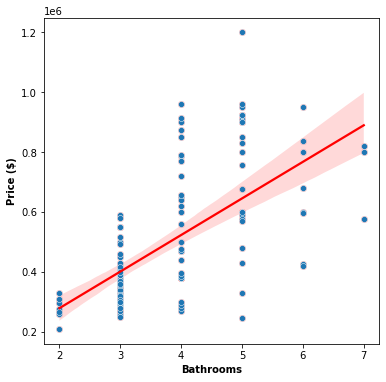

In [478]:
fig = plt.figure(figsize=(6, 6))

x1 = redfin_clean.groupby(["city", "bathrooms"]).bedrooms.first()
y1 = redfin_clean.groupby(["city", "bathrooms"]).price.first()

pt = sns.regplot(x=x1, y=y1, color='r', scatter_kws={'alpha':0.3})
pt = sns.scatterplot(x=x1,y=y1)

plt.ylabel("Price ($)", fontweight='bold')
plt.xlabel("Bathrooms", fontweight='bold')

#plt.savefig('price_vs_sqfootage.png',bbox_inches = 'tight')

Text(0.5, 0, 'Bathrooms')

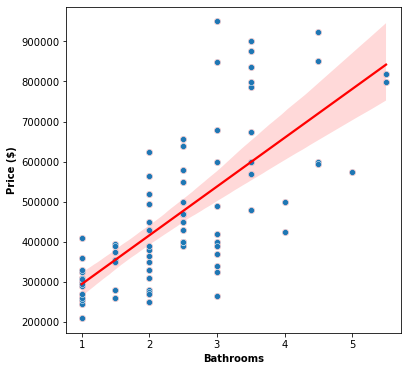

In [479]:
fig = plt.figure(figsize=(6, 6))

x1 = redfin_clean.groupby(["city", "bedrooms"]).bathrooms.first()
y1 = redfin_clean.groupby(["city", "bedrooms"]).price.first()

pt = sns.regplot(x=x1, y=y1, color='r', scatter_kws={'alpha':0.3})
pt = sns.scatterplot(x=x1,y=y1)

plt.ylabel("Price ($)", fontweight='bold')
plt.xlabel("Bathrooms", fontweight='bold')

In [480]:
redfin_clean.city.unique()

array([' Chicago', ' Park Ridge', ' Niles', ' Elmwood Park',
       ' Des Plaines', ' Mount Prospect', ' Northbrook', ' Highland Park',
       ' Glenview', ' Wood Dale', ' Bensenville', ' Addison',
       ' Schiller Park', ' Norridge', ' Franklin Park',
       ' Arlington Heights', ' Buffalo Grove', ' Morton Grove',
       ' Oak Park', ' Evanston', ' Wilmette', ' Northfield'], dtype=object)

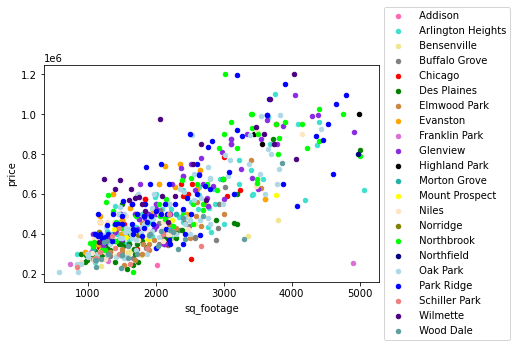

In [481]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = redfin_clean.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='sq_footage', y='price', label=key, color=colors[key])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [482]:
redfin_city

,city,bedrooms,bathrooms,price
0,Addison,3,1.5,354900
1,Addison,5,1.0,245000
2,Arlington Heights,2,1.0,300000
3,Arlington Heights,3,1.0,289900
4,Arlington Heights,3,1.5,259900
...,...,...,...,...
223,Wood Dale,4,2.5,374900
224,Wood Dale,5,2.5,375000
225,Wood Dale,5,3.5,480000
226,Wood Dale,5,6.5,755900


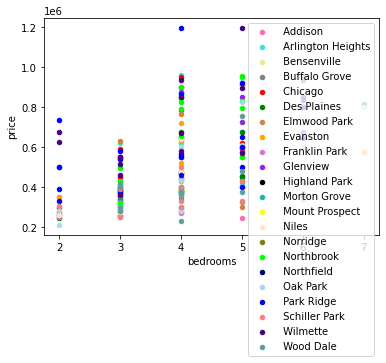

In [483]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = redfin_city.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bedrooms', y='price', label=key, color=colors[key])

plt.show()


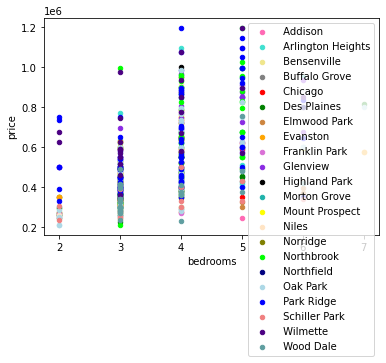

In [484]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = redfin_clean.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bedrooms', y='price', label=key, color=colors[key])

plt.show()

In [485]:
redfin_clean

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code
0,1960.0,4,3.5,3000.0,785000,Chicago,60631
3,1953.0,3,1.5,1800.0,389000,Park Ridge,60068
4,1940.0,3,2.5,2456.0,579000,Park Ridge,60068
5,1952.0,3,2.0,2187.0,369900,Park Ridge,60068
6,1951.0,4,2.0,1510.0,564900,Park Ridge,60068
...,...,...,...,...,...,...,...
1015,1967.0,5,4.5,3588.0,899000,Wilmette,60091
1016,1997.0,4,4.5,3468.0,935000,Wilmette,60091
1018,1969.0,3,2.0,2065.0,975000,Wilmette,60091
1020,1955.0,4,3.5,3684.0,1075000,Wilmette,60091


In [486]:
df

,year_built,bedrooms,bathrooms,sq_footage,price,zip_code,city_ Arlington Heights,city_ Bensenville,city_ Buffalo Grove,city_ Chicago,...,city_ Mount Prospect,city_ Niles,city_ Norridge,city_ Northbrook,city_ Northfield,city_ Oak Park,city_ Park Ridge,city_ Schiller Park,city_ Wilmette,city_ Wood Dale
0,1960.0,4,3.5,3000.0,785000,60631,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1953.0,3,1.5,1800.0,389000,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1940.0,3,2.5,2456.0,579000,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1952.0,3,2.0,2187.0,369900,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1951.0,4,2.0,1510.0,564900,60068,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1967.0,5,4.5,3588.0,899000,60091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1016,1997.0,4,4.5,3468.0,935000,60091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1018,1969.0,3,2.0,2065.0,975000,60091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1020,1955.0,4,3.5,3684.0,1075000,60091,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [487]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#homes = df.select_dtypes(include=numerics)
x = df.drop(columns = ['price','zip_code']).astype(float)
x = sm.add_constant(x)
y = df['price'].astype(float)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [488]:
model = sm.OLS(y, x, data = df)
model_2 = model.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     78.08
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          2.39e-175
Time:                        20:44:24   Log-Likelihood:                -8563.4
No. Observations:                 663   AIC:                         1.718e+04
Df Residuals:                     637   BIC:                         1.730e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.611e+06   4.15e+05     -3.879      0.000   -2.43e+06   -7.96e+05
year_built                851.1059    208.332      4.085      0.000     442.006    1260.206
bedrooms                 -879.7659   6254.292     -0.141      0.888   -1.32e+04    1.14e+04
bathrooms                4.218e+04   7096.377      5.944      0.000    2.82e+04    5.61e+04
sq_footage                120.2059      6.953     17.287      0.000     106.551     133.860
city_ Arlington Heights   6.92e+04   7.25e+04      0.955      0.340   -7.31e+04    2.11e+05
city_ Bensenville       -2.281e+04   7.53e+04     -0.303      0.762   -1.71e+05    1.25e+05
city_ Buffalo Grove     -2.115e+04   7.47e+04     -0.283      0.777   -1.68e+05    1.26e+05
city_ Chicago            1.079e+05   7.52e+04      1.434      0.152   -3.98e+04    2.56e+05
city_ Des Plaines        3.076e+04    7.3e+04      0.421      0.674   -1.13e+05    1.74e+05
city_ Elmwood Park       2.359e+04   7.42e+04      0.318      0.751   -1.22e+05    1.69e+05
city_ Evanston           1.695e+05   7.32e+04      2.315      0.021    2.57e+04    3.13e+05
city_ Franklin Park     -7.208e+04   8.47e+04     -0.851      0.395   -2.38e+05    9.42e+04
city_ Glenview            1.36e+05   7.26e+04      1.872      0.062   -6645.357    2.79e+05
city_ Highland Park      1.775e+05   9.34e+04      1.900      0.058   -5911.440    3.61e+05
city_ Morton Grove       7.006e+04   8.44e+04      0.830      0.407   -9.56e+04    2.36e+05
city_ Mount Prospect     4.306e+04   8.22e+04      0.524      0.601   -1.18e+05    2.04e+05
city_ Niles              6.226e+04   7.38e+04      0.844      0.399   -8.26e+04    2.07e+05
city_ Norridge           1.163e+05      1e+05      1.157      0.248   -8.11e+04    3.14e+05
city_ Northbrook         1.595e+05   7.29e+04      2.188      0.029    1.64e+04    3.03e+05
city_ Northfield         4.891e+04   1.25e+05      0.391      0.696   -1.97e+05    2.95e+05
city_ Oak Park           1.258e+05   7.33e+04      1.717      0.087   -1.81e+04     2.7e+05
city_ Park Ridge         1.515e+05   7.26e+04      2.088      0.037    8998.483    2.94e+05
city_ Schiller Park      2840.7372    7.7e+04      0.037      0.971   -1.48e+05    1.54e+05
city_ Wilmette           2.538e+05   7.49e+04      3.387      0.001    1.07e+05    4.01e+05
city_ Wood Dale         -1.638e+04   7.41e+04     -0.221      0.825   -1.62e+05    1.29e+05
==============================================================================
Omnibus:                       57.534   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.148
Skew:                           0.507   Prob(JB):                     1.10e-27
Kurtosis:                       4.862   Cond. No.                     3.30e+05
====================

In [489]:
np.min(err_vec_val)


77660.73278452652

In [490]:
#drop features
#variance changes- simple transformation of price, try regression of log price, could make residuals more normal
#dropping outliers- most impactful
#save notebooks to github
#beta coef for variable, do they make sense? fancy neighbors higher beta, how can we use this model? purchase homes?
#random forest regressor - probably more accurate - little harder interperet



In [491]:
income_df=pd.read_csv("income.csv")
income_df.head()

,zipcode,Adjusted gross income (AGI)
0,60004,2950351.0
1,60005,1587983.0
2,60016,1911734.0
3,60018,914025.0
4,60025,3356144.0


In [492]:
redfin_income= redfin_clean.merge(income_df, left_on= "zip_code", right_on= "zipcode")
redfin_income.groupby("Adjusted gross income (AGI)").city.first()

Adjusted gross income (AGI)
270330.0          Schiller Park
355449.0               Evanston
448028.0          Franklin Park
506236.0              Wood Dale
516331.0            Bensenville
774435.0               Norridge
850044.0               Oak Park
914025.0            Des Plaines
963778.0                Chicago
963859.0           Morton Grove
977564.0                  Niles
1115774.0               Addison
1200849.0          Elmwood Park
1227001.0               Chicago
1378503.0              Glenview
1390194.0               Chicago
1459988.0               Chicago
1587983.0     Arlington Heights
1705947.0              Evanston
1911734.0           Des Plaines
2228885.0        Mount Prospect
2294931.0         Buffalo Grove
2295192.0              Oak Park
2931922.0              Evanston
2936448.0            Park Ridge
2950351.0     Arlington Heights
3356144.0              Glenview
3799640.0              Wilmette
4212044.0            Northbrook
5423212.0         Highland Park
6279394.0   

In [493]:
redfin_income.rename(columns= {'Adjusted gross income (AGI)': "AGI"}, inplace =True)

In [494]:
redfin_income

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code,zipcode,AGI
0,1960.0,4,3.5,3000.0,785000,Chicago,60631,60631,1390194.0
1,1927.0,5,3.0,2473.0,600000,Chicago,60631,60631,1390194.0
2,1923.0,4,2.0,2533.0,650000,Chicago,60631,60631,1390194.0
3,1955.0,4,3.5,2369.0,649000,Chicago,60631,60631,1390194.0
4,1888.0,4,1.5,2518.0,275000,Chicago,60631,60631,1390194.0
...,...,...,...,...,...,...,...,...,...
658,1997.0,4,4.5,3468.0,935000,Wilmette,60091,60091,3799640.0
659,1969.0,3,2.0,2065.0,975000,Wilmette,60091,60091,3799640.0
660,1955.0,4,3.5,3684.0,1075000,Wilmette,60091,60091,3799640.0
661,1903.0,5,5.0,4040.0,1199000,Wilmette,60091,60091,3799640.0


In [495]:
#redfin_city = (redfin_clean.groupby(["city", "bedrooms", "bathrooms"], as_index=False).price.first())
redfin_income_2=redfin_income.groupby(["city", "AGI", "zip_code"], as_index=False).price.mean()
redfin_income_2.sort_values("AGI", ascending= False)

,city,AGI,zip_code,price
24,Northfield,6279394.0,60093,799500.000000
18,Highland Park,5423212.0,60035,916683.000000
23,Northbrook,4212044.0,60062,654993.092593
29,Wilmette,3799640.0,60091,707358.652174
17,Glenview,3356144.0,60025,557537.283582
2,Arlington Heights,2950351.0,60004,502995.829268
27,Park Ridge,2936448.0,60068,591053.794872
14,Evanston,2931922.0,60201,525520.000000
26,Oak Park,2295192.0,60302,581404.372093
4,Buffalo Grove,2294931.0,60089,410561.904762


In [496]:
#import sweetviz
#my_report = sweetviz.analyze([redfin_income_2, 'redfin_income_2'],'AGI')
#my_report.show_html("income_2.html")

In [497]:
homes_3_bed_2_bath = redfin_income[(redfin_income["bedrooms"] == 3) & (redfin_income["bathrooms"] == 2)]
homes_3_bed_2_bath

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code,zipcode,AGI
6,1959.0,3,2.0,1725.0,325000,Chicago,60631,60631,1390194.0
7,1957.0,3,2.0,1157.0,335800,Chicago,60631,60631,1390194.0
14,1952.0,3,2.0,2187.0,369900,Park Ridge,60068,60068,2936448.0
16,1957.0,3,2.0,1667.0,399000,Park Ridge,60068,60068,2936448.0
20,1959.0,3,2.0,1300.0,399500,Park Ridge,60068,60068,2936448.0
...,...,...,...,...,...,...,...,...,...
642,1955.0,3,2.0,1800.0,549999,Wilmette,60091,60091,3799640.0
644,1957.0,3,2.0,1600.0,569900,Wilmette,60091,60091,3799640.0
646,1954.0,3,2.0,1750.0,585000,Wilmette,60091,60091,3799640.0
649,1949.0,3,2.0,1400.0,625000,Wilmette,60091,60091,3799640.0


In [516]:
redfin_city_agi= redfin_income.groupby(["city"], as_index=False).AGI.first()

In [514]:
redfin_income.groupby(["city"], as_index=False).AGI.first()

,city,AGI
0,Addison,1115774.0
1,Arlington Heights,1587983.0
2,Bensenville,516331.0
3,Buffalo Grove,2294931.0
4,Chicago,1390194.0
5,Des Plaines,1911734.0
6,Elmwood Park,1200849.0
7,Evanston,1705947.0
8,Franklin Park,448028.0
9,Glenview,3356144.0


In [518]:
redfin_city_agi.sort_values("AGI", ascending=False)

,city,AGI
16,Northfield,6279394.0
10,Highland Park,5423212.0
15,Northbrook,4212044.0
20,Wilmette,3799640.0
9,Glenview,3356144.0
18,Park Ridge,2936448.0
3,Buffalo Grove,2294931.0
12,Mount Prospect,2228885.0
5,Des Plaines,1911734.0
7,Evanston,1705947.0


In [363]:
x = homes_3_bed_2_bath.drop(columns = ['price','zip_code', "bedrooms", "bathrooms", "city", "year_built", "zipcode"]).astype(float)
x = sm.add_constant(x)
y = homes_3_bed_2_bath['price'].astype(float)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [364]:
model = sm.OLS(y, x, data = homes_3_bed_2_bath)
model_4 = model.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     15.59
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           8.72e-07
Time:                        20:37:57   Log-Likelihood:                -1676.8
No. Observations:                 131   AIC:                             3360.
Df Residuals:                     128   BIC:                             3368.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.418e+05   3.52e+04      6.871      0.000    1.72e+05    3.11e+05
sq_footage    79.1123     21.461      3.686      0.000      36.649     121.576
AGI            0.0232      0.007      3.506      0.001       0.010       0.036
==============================================================================
Omnibus:                       55.966   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.992
Skew:                           1.402   Prob(JB):                     5.25e-60
Kurtosis:                       9.493   Cond. No.                     1.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

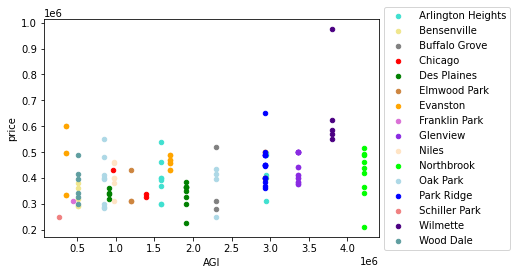

In [365]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = homes_3_bed_2_bath.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AGI', y='price', label=key, color=colors[key])
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [366]:
homes_4_bed_3_bath = redfin_income[(redfin_income["bedrooms"] == 4) & (redfin_income["bathrooms"] == 3)]
homes_4_bed_3_bath

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code,zipcode,AGI
113,1954.0,4,3.0,2477.0,475000,Niles,60714,60714,977564.0
126,1929.0,4,3.0,2500.0,379000,Elmwood Park,60707,60707,1200849.0
133,1928.0,4,3.0,1800.0,455000,Elmwood Park,60707,60707,1200849.0
136,1930.0,4,3.0,1813.0,349900,Elmwood Park,60707,60707,1200849.0
158,1961.0,4,3.0,2300.0,380000,Des Plaines,60016,60016,1911734.0
159,1950.0,4,3.0,1725.0,350000,Des Plaines,60016,60016,1911734.0
166,1962.0,4,3.0,1598.0,399000,Des Plaines,60016,60016,1911734.0
177,1978.0,4,3.0,3724.0,875000,Des Plaines,60016,60016,1911734.0
253,1956.0,4,3.0,3200.0,829000,Northbrook,60062,60062,4212044.0
377,1946.0,4,3.0,2109.0,399900,Schiller Park,60176,60176,270330.0


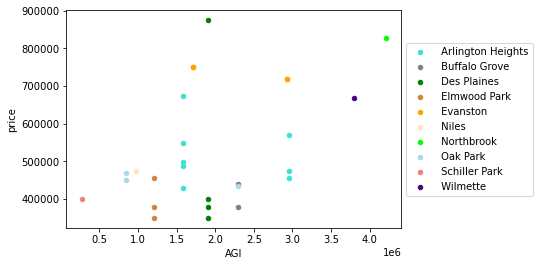

In [367]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = homes_4_bed_3_bath.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AGI', y='price', label=key, color=colors[key])
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [368]:
redfin_income.bedrooms.describe()
redfin_income.bathrooms.describe()

count    663.000000
mean       2.420060
std        0.913364
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        6.500000
Name: bathrooms, dtype: float64

In [369]:
homes_3_bed_25_bath = redfin_income[(redfin_income["bedrooms"] == 3) & (redfin_income["bathrooms"] == 2.5)]
homes_3_bed_25_bath

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code,zipcode,AGI
9,1927.0,3,2.5,1537.0,449000,Chicago,60631,60631,1390194.0
13,1940.0,3,2.5,2456.0,579000,Park Ridge,60068,60068,2936448.0
19,1926.0,3,2.5,2650.0,395000,Park Ridge,60068,60068,2936448.0
47,1955.0,3,2.5,1662.0,424900,Park Ridge,60068,60068,2936448.0
74,1950.0,3,2.5,2158.0,499000,Park Ridge,60068,60068,2936448.0
100,1963.0,3,2.5,1132.0,379900,Niles,60714,60714,977564.0
106,1949.0,3,2.5,1869.0,419000,Niles,60714,60714,977564.0
172,1966.0,3,2.5,1600.0,350000,Des Plaines,60016,60016,1911734.0
181,1978.0,3,2.5,2385.0,420000,Des Plaines,60016,60016,1911734.0
194,1963.0,3,2.5,1273.0,384900,Des Plaines,60018,60018,914025.0


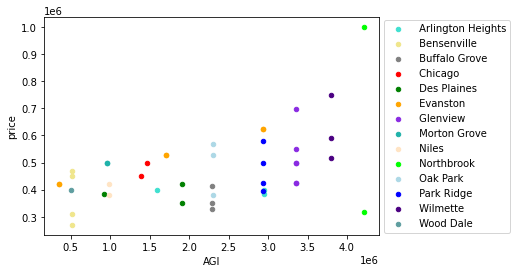

In [370]:
fig, ax = plt.subplots()

colors = {' Chicago': 'red', ' Park Ridge':"blue", ' Niles': "bisque", ' Elmwood Park': "peru",
       ' Des Plaines':"green", ' Mount Prospect':"yellow", ' Northbrook':"lime", ' Highland Park':"black",
       ' Glenview': "blueviolet", ' Wood Dale': "cadetblue", ' Bensenville':"khaki", ' Addison':"hotpink",
       ' Schiller Park':"lightcoral", ' Norridge':"olive", ' Franklin Park':"orchid",
       ' Arlington Heights':"turquoise", ' Buffalo Grove':"gray", ' Morton Grove':"lightseagreen",
       ' Oak Park':"lightblue", ' Evanston':"orange", ' Wilmette':"indigo", ' Northfield':"navy"}

grouped = homes_3_bed_25_bath.groupby('city')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AGI', y='price', label=key, color=colors[key])
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [371]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
homes_income = redfin_income_2.select_dtypes(include=numerics)
x = homes_income.drop(columns = ['price', "zip_code"]).astype(float)
x = sm.add_constant(x)
y = homes_income['price'].astype(float)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [372]:
model = sm.OLS(y, x, data = redfin_income_2)
model_3 = model.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     36.24
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.51e-06
Time:                        20:37:59   Log-Likelihood:                -401.35
No. Observations:                  31   AIC:                             806.7
Df Residuals:                      29   BIC:                             809.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.556e+05   3.11e+04     11.434      0.000    2.92e+05    4.19e+05
AGI            0.0780      0.013      6.020      0.000       0.051       0.104
==============================================================================
Omnibus:                       19.182   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.693
Skew:                           1.502   Prob(JB):                     9.70e-07
Kurtosis:                       6.523   Cond. No.                     3.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
redfin_income.city.unique()

array([' Chicago', ' Park Ridge', ' Niles', ' Elmwood Park',
       ' Des Plaines', ' Mount Prospect', ' Northbrook', ' Highland Park',
       ' Glenview', ' Wood Dale', ' Bensenville', ' Addison',
       ' Schiller Park', ' Norridge', ' Franklin Park',
       ' Arlington Heights', ' Buffalo Grove', ' Morton Grove',
       ' Oak Park', ' Evanston', ' Wilmette', ' Northfield'], dtype=object)

In [374]:
arlington_heights = redfin_income[(redfin_income["city"] == ' Arlington Heights')]
arlington_heights

,year_built,bedrooms,bathrooms,sq_footage,price,city,zip_code,zipcode,AGI
393,1962.0,3,1.5,1100.0,259900,Arlington Heights,60005,60005,1587983.0
394,1955.0,3,2.0,1046.0,299000,Arlington Heights,60005,60005,1587983.0
395,1960.0,3,1.5,1176.0,299900,Arlington Heights,60005,60005,1587983.0
396,1955.0,3,2.0,1158.0,299900,Arlington Heights,60005,60005,1587983.0
397,1929.0,2,1.0,832.0,300000,Arlington Heights,60005,60005,1587983.0
...,...,...,...,...,...,...,...,...,...
467,2007.0,4,3.5,3230.0,649925,Arlington Heights,60004,60004,2950351.0
468,2007.0,4,4.5,4375.0,845000,Arlington Heights,60004,60004,2950351.0
469,1963.0,5,3.5,3677.0,850000,Arlington Heights,60004,60004,2950351.0
470,2002.0,6,4.0,4092.0,950000,Arlington Heights,60004,60004,2950351.0


In [375]:
x = arlington_heights.drop(columns = ['price','zip_code', "city", "zipcode", "AGI" ]).astype(float)
x = sm.add_constant(x)
y = arlington_heights['price'].astype(float)

/Users/snizhanakurylyuk/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [376]:
model = sm.OLS(y, x, data = arlington_heights)
model_AH = model.fit()
model_AH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     46.02
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.32e-19
Time:                        20:37:59   Log-Likelihood:                -1013.5
No. Observations:                  79   AIC:                             2037.
Df Residuals:                      74   BIC:                             2049.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.13e+06   1.32e+06     -0.858      0.394   -3.75e+06    1.49e+06
year_built   659.4178    679.968      0.970      0.335    -695.449    2014.284
bedrooms   -1.071e+04    1.6e+04     -0.667      0.507   -4.27e+04    2.13e+04
bathrooms   5.636e+04   2.16e+04      2.610      0.011    1.33e+04    9.94e+04
sq_footage   104.5982     18.045      5.797      0.000      68.643     140.554
==============================================================================
Omnibus:                       17.503   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.015
Skew:                           0.827   Prob(JB):                     3.04e-07
Kurtosis:                       5.527   Cond. No.                     3.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [377]:

s1 = pd.DataFrame(preds)
s1
s2 =  pd.DataFrame(y_test)
s3 = redfin_clean[['city','sq_footage', "bedrooms", "bathrooms"]]
df_pred = s2.merge(s3, left_index = True, right_index = True).reset_index()
df_pred = pd.concat([df_pred, s1], axis=1)
cols = df.columns.tolist()

df_pred.head(30)

,index,price,city,sq_footage,bedrooms,bathrooms,0
0,953,399000,Evanston,1500.0,3,2.0,4.843261e+05
1,616,489000,Niles,1566.0,5,3.0,4.192120e+05
2,308,489000,Northbrook,2060.0,5,3.0,5.772834e+05
3,755,649000,Glenview,2232.0,4,2.5,5.701990e+05
4,959,489000,Evanston,1172.0,3,2.0,4.106063e+05
5,939,750000,Evanston,2362.0,4,3.0,5.711818e+05
6,776,910000,Glenview,4915.0,5,5.0,1.014466e+06
7,394,359000,Bensenville,1309.0,3,2.0,2.718748e+05
8,415,339999,Schiller Park,2658.0,6,3.0,5.127383e+05
9,52,1149000,Park Ridge,3897.0,5,4.5,9.121119e+05


In [378]:
s1

,0
0,484326.104825
1,419211.952749
2,577283.383647
3,570199.049580
4,410606.339971
...,...
128,282484.776078
129,451099.527741
130,809354.875147
131,433850.814086


In [379]:

s1 = pd.DataFrame(preds)
s1
s2 =  pd.DataFrame(y_test)
s3 = redfin_clean[['city','sq_footage']]
df_pred = s2.merge(s3, left_index = True, right_index = True).reset_index()
df_pred = pd.concat([df_pred, s1], axis=1)
cols = df.columns.tolist()

df_pred.head(50)

,index,price,city,sq_footage,0
0,953,399000,Evanston,1500.0,4.843261e+05
1,616,489000,Niles,1566.0,4.192120e+05
2,308,489000,Northbrook,2060.0,5.772834e+05
3,755,649000,Glenview,2232.0,5.701990e+05
4,959,489000,Evanston,1172.0,4.106063e+05
5,939,750000,Evanston,2362.0,5.711818e+05
6,776,910000,Glenview,4915.0,1.014466e+06
7,394,359000,Bensenville,1309.0,2.718748e+05
8,415,339999,Schiller Park,2658.0,5.127383e+05
9,52,1149000,Park Ridge,3897.0,9.121119e+05


In [380]:
df_pred.columns

Index(['index', 'price', 'city', 'sq_footage', 0], dtype='object')

In [381]:
df_pred["mean_variance"]= (df_pred[0] - df_pred["price"])
df_pred.sort_values("mean_variance", ascending=True)

,index,price,city,sq_footage,0,mean_variance
14,736,895500,Oak Park,3391.0,644678.368578,-250821.631422
121,199,549000,Des Plaines,1500.0,308751.970000,-240248.030000
52,515,599995,Arlington Heights,2000.0,362679.207976,-237315.792024
9,52,1149000,Park Ridge,3897.0,912111.866999,-236888.133001
5,939,750000,Evanston,2362.0,571181.840133,-178818.159867
...,...,...,...,...,...,...
99,5,369900,Park Ridge,2187.0,545461.075506,175561.075506
11,97,699900,Park Ridge,4613.0,942662.952101,242762.952101
69,260,209999,Northbrook,1659.0,483057.201717,273058.201717
45,969,575000,Evanston,3600.0,873888.770940,298888.770940


In [382]:
df_pred_variance=df_pred.groupby(["city"], as_index=False).mean_variance.mean()


In [383]:
df_pred_variance= df_pred_variance.sort_values("mean_variance", ascending=True)
df_pred_variance

,city,mean_variance
9,Morton Grove,-64103.527802
1,Bensenville,-61930.647774
16,Wood Dale,-36213.895831
4,Des Plaines,-29080.322156
10,Niles,-28462.900408
3,Chicago,-18807.086343
0,Arlington Heights,-10842.262325
2,Buffalo Grove,-9316.502216
12,Oak Park,-1132.372519
5,Elmwood Park,-521.287717
